In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
pd.options.mode.chained_assignment = None  

In [2]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

## Display key variables

In [3]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

<AxesSubplot:>

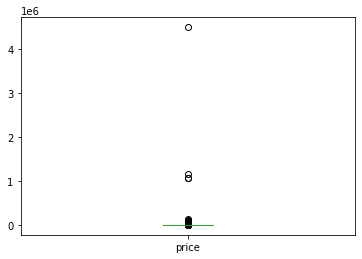

In [7]:
train['price'].plot(kind='box')

2500     1106
3200      881
3000      840
2700      777
2400      772
         ... 
3721        1
12325       1
6481        1
1560        1
2891        1
Name: price, Length: 2688, dtype: int64

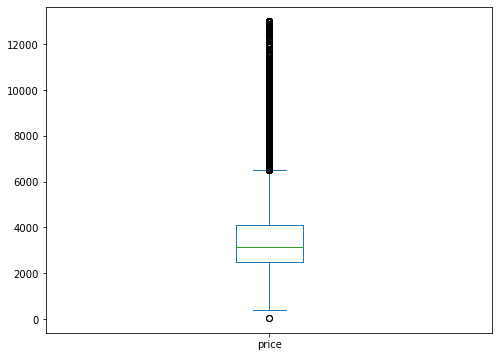

In [8]:
ulimit = np.percentile(train.price.values, 99)
train['price'].loc[train['price'] > ulimit] = ulimit
plt.figure(figsize=(8,6))
train['price'].plot(kind='box')
train['price'].value_counts()

In [9]:
train['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

Text(0.5, 1.0, 'Apartment per Interest level')

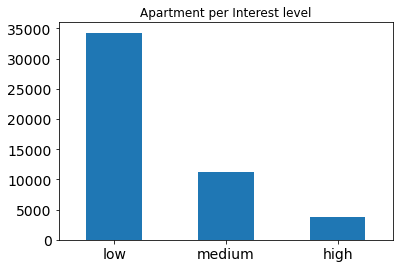

In [10]:
train['interest_level'].value_counts().plot(kind='bar', label='interest_level', rot=0, fontsize=14)
plt.title('Apartment per Interest level')

## Exploring the relationship between key variables

### Exploring the relationship between interest_level and price

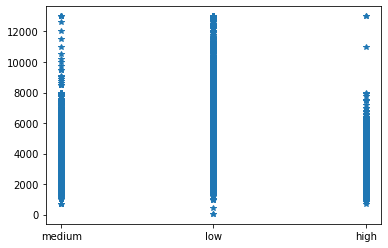

In [11]:
plt.plot(train['interest_level'], train['price'], '*')

### Bathroom number

In [12]:
train['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: bathrooms, dtype: int64

<AxesSubplot:>

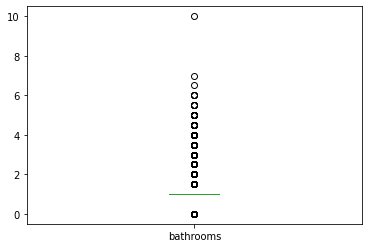

In [13]:
train['bathrooms'].plot(kind='box')

### Exploring the relationship between bathrooms and number of clicking

/Users/fangwenrui/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


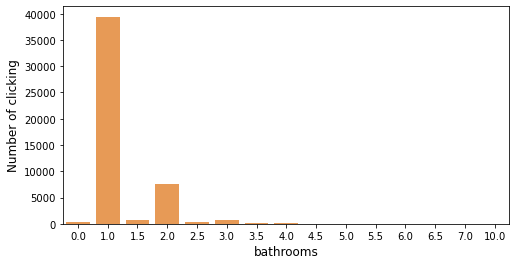

In [14]:
cnt_srs = train['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

### Exploring in the bathroom area,  the relationship between number of clicking and interest level

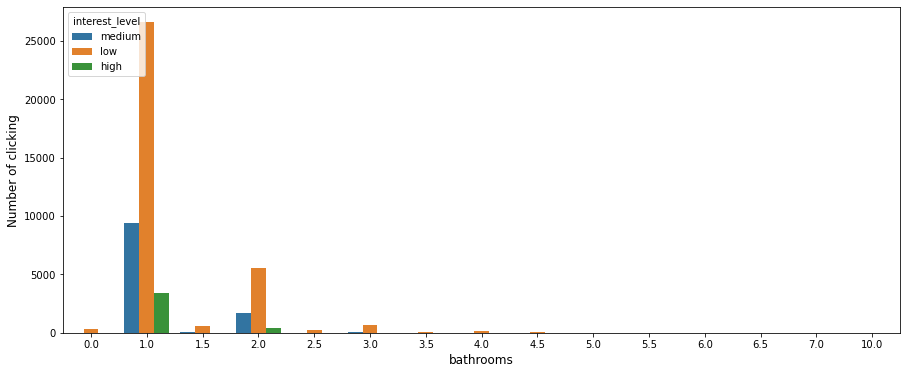

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x ='bathrooms', hue ='interest_level', data=train)
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

### Exploring the relationship between bedrooms and number of clicking

/Users/fangwenrui/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


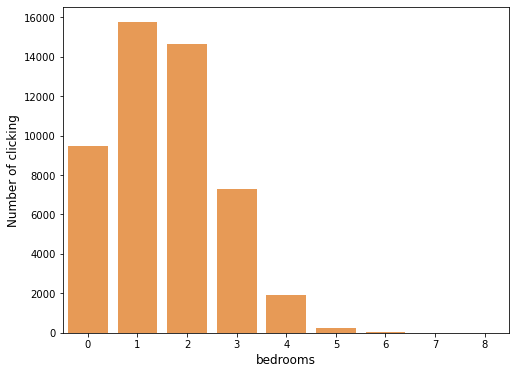

In [16]:
cnt_srs = train['bedrooms'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

### Exploring in the bedroom the relationship between number of clicking and interest level

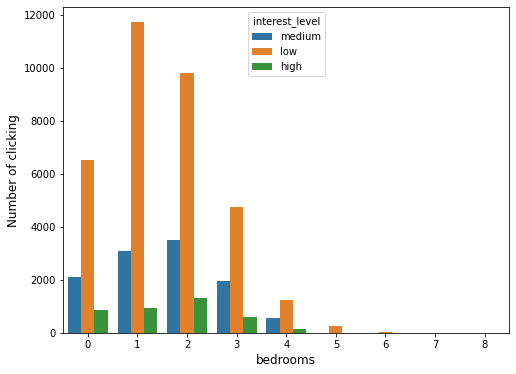

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

### Exploring the relationship among number of bathroom  and interest level

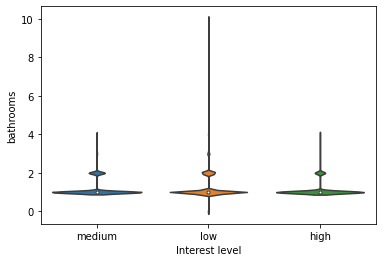

In [18]:
train['bathrooms']=train['bathrooms'].astype(int)
train.loc[train['bathrooms']==0, 'interest_level'] = 'low'
sns.violinplot(x='interest_level', y='bathrooms', data=train)
plt.xlabel('Interest level')
plt.ylabel('bathrooms')
plt.show()

### Exploring the relationship among number of  bedroom and interest level

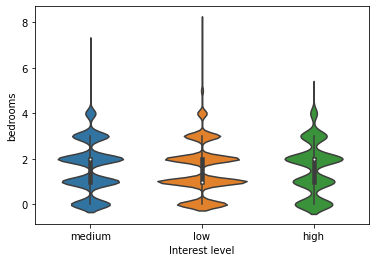

In [19]:
sns.violinplot(x='interest_level', y='bedrooms', data=train)
plt.xlabel('Interest level')
plt.ylabel('bedrooms')
plt.show()

### Exploring the relationship between the listing price and interest level

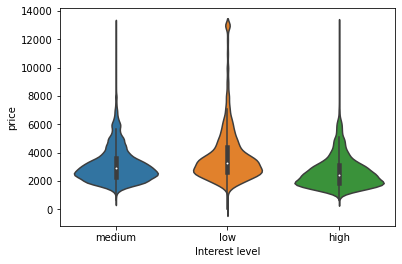

In [20]:
ulimit = np.percentile(train.price.values, 99)

train.loc[train['price'] > ulimit, 'interest_level'] = 'low'
sns.violinplot(x='interest_level', y='price', data=train)
plt.xlabel('Interest level')
plt.ylabel('price')
plt.show()

### Exploring the relationship between number of photos and number of occurrences 

/Users/fangwenrui/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


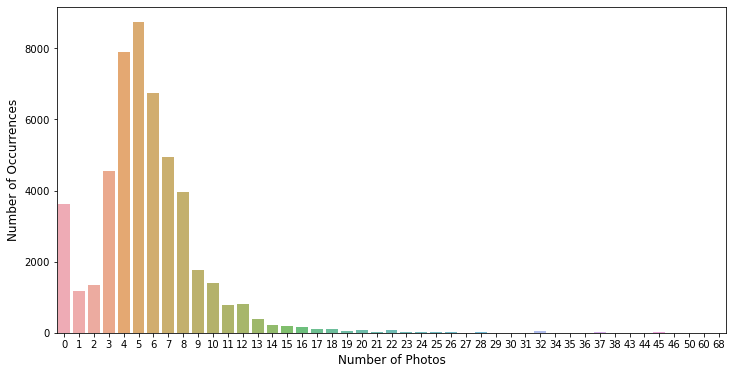

In [21]:
train["num_photos"] = train["photos"].apply(len)
cnt_srs = train['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

### Exploring the relationship between number of features and number of occurrences 

/Users/fangwenrui/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


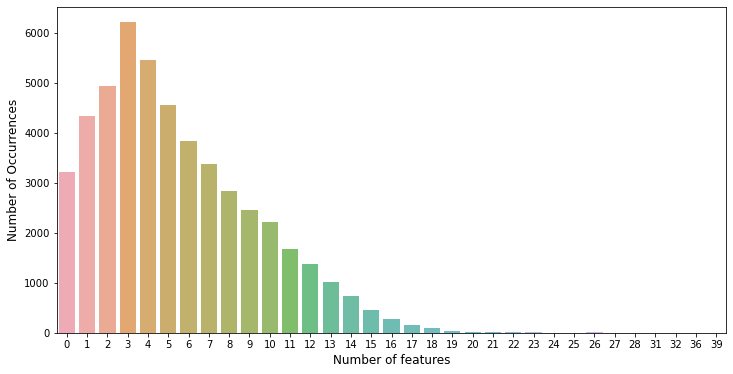

In [22]:
train["num_features"] = train["features"].apply(len)
cnt_srs = train['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()